In [ ]:
#installing while silencing the outputs

pip install transformers > NUL 2>&1

In [ ]:
#importing all the essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import re #for data pre-processing
import unicodedata #library for data pre-processing
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#mounting drive to collab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading file from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv')

In [ ]:
#Printing top 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#Assigning X & y with review and sentiment respectively

X = df['review']
y = df['sentiment']

In [ ]:
#splitting values in to train, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7,stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.57, random_state=42)

In [ ]:
#chceking the length of the train, validation and test sets

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Training set size: 15000
Test set size: 19950
Validation set size: 15050


In [ ]:
#seeing the index locations for the variables

print(X_train.index)
print(X_test.index)
print(X_val.index)

Int64Index([12276,  4319,  4210, 20735, 49290, 39716, 45480,  6587, 17792,
            42351,
            ...
            42187, 36288, 22917,   710, 11540, 17731, 25976, 36837, 35597,
            23156],
           dtype='int64', length=15000)
Int64Index([37705, 15809, 25154, 10620,  6067, 11681, 46162, 44805,  4023,
            18822,
            ...
            14298, 49558, 37247, 48609, 42453,  4235,  2155, 26268, 42437,
            21006],
           dtype='int64', length=19950)
Int64Index([  861, 15012, 42736, 20335, 47365, 43667, 29783,  7072, 14691,
            44643,
            ...
            44013, 26105, 39106,   796, 22364, 33486,  9510, 24406, 45997,
            18961],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [ ]:
# Verifying the updated index values

print(X_train.index)
print(X_test.index)
print(X_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
#Printing the data brfore pre processing

print(X_train[0])
print(X_test[0])
print(X_val[0])

The 4th Pokemon movie made me cry when Celebi died. Don't you dare say that Pokemon sucks! I don't like it when people say that.... I've liked Pokemon for 5 or 6 years, so everyone should enjoy Pokemon, including this movie and other Pokemon movies. So, without further ado, please say that Pokemon is great and should be enjoyed by people for all ages. And also, why do Pokemon-haters give low ratings for all or most of the Pokemon movies? I don't understand.... They shouldn't do that.... There's absolutely no reason why people should just vote without proving that Pokemon sucks besides the fact that: 1) Pokemon is for little kids ONLY. 2) Pokemon is stupid. and 3) People shouldn't like Pokemon. I think this is why people don't like Pokemon.
The gimmick, as it were, of this 1934 Paramount comedy is the six comedy performers, paired off into three man-and-woman teams, who all appear together. W. C. Fields and his frequent screen partner Alsion Skipworth appear in the second half of the fi

In [ ]:
#seeing the index locations for the variables

print(y_train.index)
print(y_test.index)
print(y_val.index)

Int64Index([12276,  4319,  4210, 20735, 49290, 39716, 45480,  6587, 17792,
            42351,
            ...
            42187, 36288, 22917,   710, 11540, 17731, 25976, 36837, 35597,
            23156],
           dtype='int64', length=15000)
Int64Index([37705, 15809, 25154, 10620,  6067, 11681, 46162, 44805,  4023,
            18822,
            ...
            14298, 49558, 37247, 48609, 42453,  4235,  2155, 26268, 42437,
            21006],
           dtype='int64', length=19950)
Int64Index([  861, 15012, 42736, 20335, 47365, 43667, 29783,  7072, 14691,
            44643,
            ...
            44013, 26105, 39106,   796, 22364, 33486,  9510, 24406, 45997,
            18961],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [ ]:
print(y_train.index)
print(y_test.index)
print(y_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
print(y_train[0])
print(y_test[0])
print(y_val[0])

positive
positive
negative


In [ ]:
def preprocess_text(text):
    # Removing HTML tags
    text = re.sub('<.*?>', '', text)

    # Removing accented characters by normalizing to ASCII
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Replacing patterns like n't, nt, and n t with not
    text = re.sub(r"\b(n['’]?t|n\s?t)\b", ' not', text)

    # Removing special characters
    text = re.sub("[^a-zA-Z0-9,'!]", ' ', text)

    # Converting text to lowercase
    text = text.lower()

    # Separating text into sentences based on punctuations and then removing punctuations
    sentences = re.split(r'[.!?]', text)
    sentences = [re.sub('[,]', '', sentence) for sentence in sentences]

    # Removing extra spaces
    text = ' '.join(' '.join(sentence.split()) for sentence in sentences)

    return text

In [ ]:
# Preprocessing the data

X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test_preprocessed = [preprocess_text(text) for text in X_test]

X_val_preprocessed = [preprocess_text(text) for text in X_val]


In [ ]:
#Printing pre processed data

print(X_train_preprocessed[0])
print(X_test_preprocessed[0])
print(X_val_preprocessed[0])

the 4th pokemon movie made me cry when celebi died don't you dare say that pokemon sucks i don't like it when people say that i've liked pokemon for 5 or 6 years so everyone should enjoy pokemon including this movie and other pokemon movies so without further ado please say that pokemon is great and should be enjoyed by people for all ages and also why do pokemon haters give low ratings for all or most of the pokemon movies i don't understand they shouldn't do that there's absolutely no reason why people should just vote without proving that pokemon sucks besides the fact that 1 pokemon is for little kids only 2 pokemon is stupid and 3 people shouldn't like pokemon i think this is why people don't like pokemon
the gimmick as it were of this 1934 paramount comedy is the six comedy performers paired off into three man and woman teams who all appear together w c fields and his frequent screen partner alsion skipworth appear in the second half of the film and shine in their roles as a smal

In [ ]:
# Preprocessing the data

y_train_preprocessed = [preprocess_text(text) for text in y_train]

y_test_preprocessed = [preprocess_text(text) for text in y_test]

y_val_preprocessed = [preprocess_text(text) for text in y_val]


Tokenizing and creating datasets for train, validation and test sets so they can be used through out different types of training sessions and evaluation of diferent models

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenizing and encoding the train data
X_train_encoded = tokenizer.batch_encode_plus(
    X_train_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
# Tokenizing and encoding the validation data
X_val_encoded = tokenizer.batch_encode_plus(
    X_val_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
label_map = {"positive": 1, "negative": 0}

# Extracting input tensors from the encoded data
input_ids_train = X_train_encoded['input_ids']
attention_masks_train = X_train_encoded['attention_mask']
labels_train = torch.tensor([label_map[label] for label in y_train_preprocessed])

input_ids_val = X_val_encoded['input_ids']
attention_masks_val = X_val_encoded['attention_mask']
labels_val = torch.tensor([label_map[label] for label in y_val_preprocessed])

# Creating datasets
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
# Tokenizing and encoding the test data
X_test_encoded = tokenizer.batch_encode_plus(
    X_test_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
# Extracting input tensors and attention masks from the encoded data
label_map = {"positive": 1, "negative": 0}

input_ids_test = X_test_encoded['input_ids']
attention_masks_test = X_test_encoded['attention_mask']
labels_test = torch.tensor([label_map[label] for label in y_test_preprocessed])

# Creating datasets
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:
# Setting the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Optimization using Hidden Layers


In [ ]:
class CustomBERTModel(nn.Module):
    def __init__(self, num_bert_layers=12):
        super(CustomBERTModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")

        # Learnable weights for each layer
        self.layer_weights = nn.Parameter(torch.ones(num_bert_layers) / num_bert_layers)

        # New layers
        self.linear1 = nn.Linear(768, 256)
        self.linear2 = nn.Linear(256, 2)

    def forward(self, input_ids, attention_mask):
        # Get all hidden states
        outputs = self.bert(input_ids, attention_mask=attention_mask, output_hidden_states=True)
        all_hidden_states = outputs[2]

        # Weighted combination of all layers
        weighted_sum = sum(w * hidden_state for w, hidden_state in zip(self.layer_weights, all_hidden_states))

        linear1_output = self.linear1(weighted_sum[:,0,:].view(-1,768))
        linear2_output = self.linear2(linear1_output).squeeze()


        return linear2_output

In [ ]:
model = CustomBERTModel()

In [ ]:
from torch.optim.lr_scheduler import LambdaLR
from torch.nn import CrossEntropyLoss

In [ ]:
# Moving the model to the device
model.to(device)

# declaring Hyperparameters
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
stop_training = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()


# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
lambda_lr = lambda epoch: 0.95 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda_lr)
loss_fn = CrossEntropyLoss()


# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks)

        loss = loss_fn(outputs, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


# Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            stop_training = 1
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBHLO1.pt"
torch.save(best_model_state, BERT_Tuned_file)

Epoch 1/5, Loss: 0.29907179664373396, Validation Accuracy: 0.9216611295681063
Epoch 2/5, Loss: 0.1404722452978293, Validation Accuracy: 0.9255813953488372
Epoch 3/5, Loss: 0.07089786670108636, Validation Accuracy: 0.9269102990033222
Epoch 4/5, Loss: 0.042841025534520544, Validation Accuracy: 0.920797342192691
Epoch 5/5, Loss: 0.02608099684069554, Validation Accuracy: 0.92


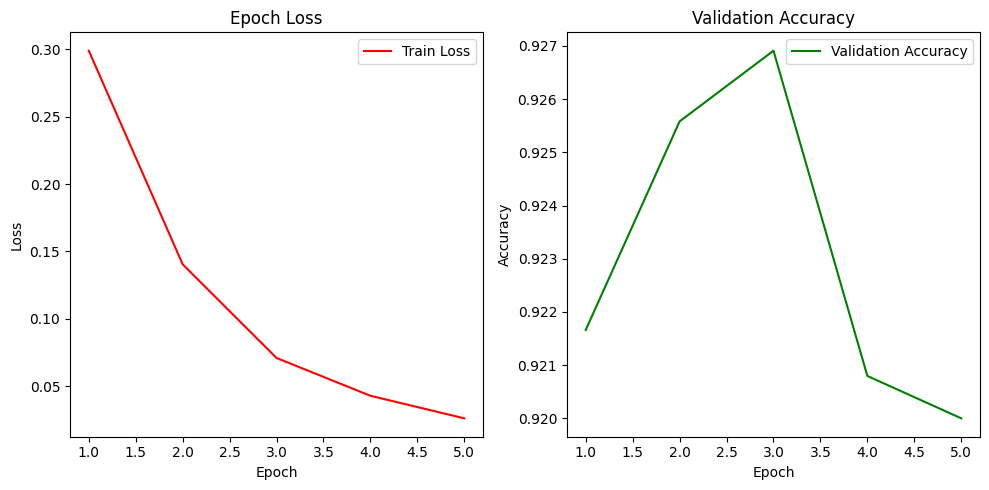

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBHLO1_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBHLO1.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))

<All keys matched successfully>

In [ ]:
model.to(device)
model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()


with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 92.11%
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.94      0.92     10012
    positive       0.94      0.90      0.92      9938

    accuracy                           0.92     19950
   macro avg       0.92      0.92      0.92     19950
weighted avg       0.92      0.92      0.92     19950

Confusion Matrix:
 [[9422  590]
 [ 984 8954]]


# 2. Tezting the Pre-Training of BERT for better accuracy!

In [ ]:
from transformers import BertForMaskedLM, DataCollatorForLanguageModeling
from torch.optim.lr_scheduler import CosineAnnealingLR
import copy

In [ ]:
#Data Pre-processing
with open('/content/drive/MyDrive/Colab Notebooks/wikitext-2/wiki.train.tokens', 'r') as file:
    wikitext_data = file.readlines()

pretrain_preprocessed = [preprocess_text(text) for text in wikitext_data]

pretrain_encoded = tokenizer.batch_encode_plus(
    pretrain_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

pretrain_dataset = pretrain_encoded

# Data Pre-processing for validation data
with open('/content/drive/MyDrive/Colab Notebooks/wikitext-2/wiki.valid.tokens', 'r') as file:
    wikitext_val_data = file.readlines()

preval_preprocessed = [preprocess_text(text) for text in wikitext_val_data]

# Encoding the validation data
preval_encoded = tokenizer.batch_encode_plus(
    preval_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

preval_dataset = preval_encoded

In [ ]:
pretrain_dataset_list = [{k: v[i] for k, v in pretrain_encoded.items()} for i in range(len(pretrain_encoded['input_ids']))]
preval_dataset_list = [{k: v[i] for k, v in preval_encoded.items()} for i in range(len(preval_encoded['input_ids']))]

In [ ]:
model = BertForMaskedLM.from_pretrained('bert-base-uncased').to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
batch_size = 16
num_cpu = 12
num_epochs_pretrain = 3
early_stopping_patience = 2
epochs_without_improvement = 0
best_accuracy = 0.0
pre_train_losses = []
pre_train_accuracies = []
pre_train_losses.clear()
pre_train_accuracies.clear()

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)
pretrain_dataloader = DataLoader(pretrain_dataset_list, batch_size=batch_size, num_workers=num_cpu, shuffle=True, collate_fn=data_collator)
val_dataloader = DataLoader(preval_dataset_list, batch_size=batch_size, num_workers=num_cpu, shuffle=False, collate_fn=data_collator)

# Pre-training

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs_pretrain, eta_min=1e-6)

for epoch in range(num_epochs_pretrain):
    running_loss = 0.0
    model.train()

    for batch in pretrain_dataloader:
        inputs = batch['input_ids'].to(device)
        attention_masks = batch['attention_mask'].to(device)
        labels = inputs.clone()

        optimizer.zero_grad()

        outputs = model(inputs, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    pre_train_losses.append(epoch_loss)

    scheduler.step()

    #Validation
    model.eval()
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in pretrain_dataloader:
            inputs = batch['input_ids'].to(device)
            attention_masks = batch['attention_mask'].to(device)
            labels = inputs.clone()

            outputs = model(inputs, attention_mask=attention_masks)
            logits = outputs.logits

            predicted_indices = torch.argmax(logits, 2)
            valid_positions = (labels != tokenizer.pad_token_id) & (labels != tokenizer.cls_token_id) & (labels != tokenizer.sep_token_id)
            valid_predictions = (predicted_indices == labels) & valid_positions
            correct_predictions += valid_predictions.sum().item()
            total_predictions += valid_positions.sum().item()

    accuracy = correct_predictions / total_predictions
    pre_train_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model = copy.deepcopy(model)
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs_pretrain}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/bert_pretrained"
best_model.save_pretrained(BERT_Tuned_file)

Epoch 1/3, Loss: 0.16461184686029445, Validation Accuracy: 0.9994730842082789
Epoch 2/3, Loss: 0.0011593572791365053, Validation Accuracy: 0.9995126015550645
Epoch 3/3, Loss: 0.0009702207408481627, Validation Accuracy: 0.9995493772239551


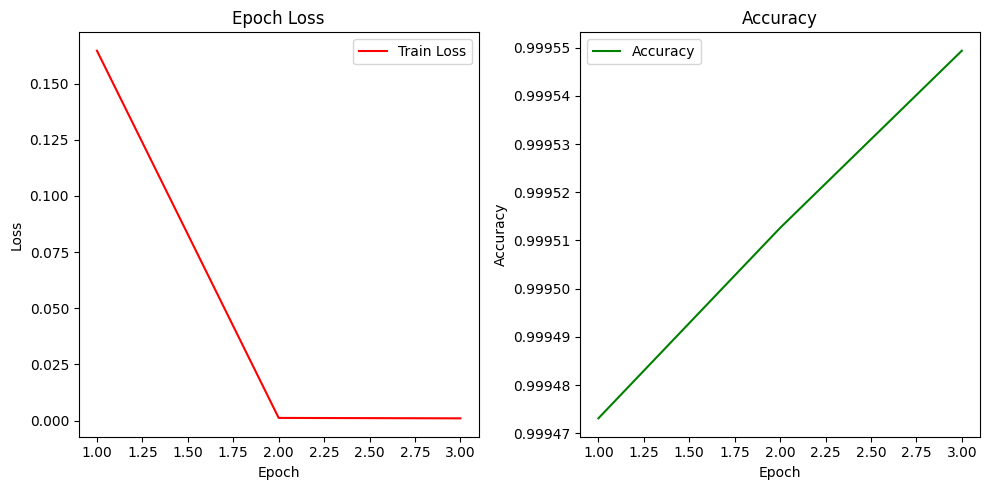

In [ ]:
# Plotting epoch loss and validation accuracy graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
num_epochs_pretrain = len(pre_train_losses)
plt.plot(range(1, num_epochs_pretrain + 1), pre_train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs_pretrain + 1), pre_train_accuracies, label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBPre_Training_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Colab Notebooks/bert_pretrained", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/bert_pretrained and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)
# declaring Hyperparameters
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels =labels)

        loss = outputs.loss
        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBPT.pt"
torch.save(best_model_state, BERT_Tuned_file)

Epoch 1/5, Loss: 0.31055562959512073, Validation Accuracy: 0.9215282392026578
Epoch 2/5, Loss: 0.13700937451322873, Validation Accuracy: 0.9285049833887044
Epoch 3/5, Loss: 0.06287818431829413, Validation Accuracy: 0.926843853820598
Epoch 4/5, Loss: 0.027129021782179675, Validation Accuracy: 0.9278405315614618
Early stopping triggered.


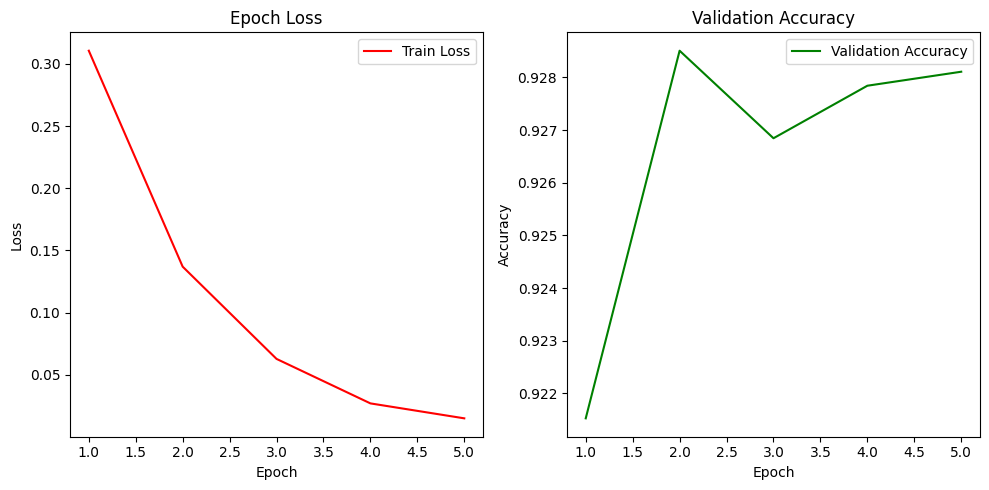

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBPT_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBPT.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))

<All keys matched successfully>

In [ ]:
model.to(device)
model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 92.41%
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.92      0.92     10012
    positive       0.92      0.92      0.92      9938

    accuracy                           0.92     19950
   macro avg       0.92      0.92      0.92     19950
weighted avg       0.92      0.92      0.92     19950

Confusion Matrix:
 [[9254  758]
 [ 756 9182]]


# 3 Trying Distil BERT

In [ ]:
from transformers import DistilBertForSequenceClassification
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn.functional as F

In [ ]:
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
temperature = 5.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()
loss_fn = nn.CrossEntropyLoss()

# Initializing the BERT teacher model
teacher_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2).to(device)
teacher_model.eval()  # Setting to evaluation mode

# Initializing the DistilBERT student model and tokenizer
student_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 2).to(device)

optimizer = optim.Adam(student_model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0
    student_model.train()  # Setting to training mode

    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            teacher_outputs = teacher_model(inputs, attention_mask=attention_masks)
            teacher_logits =  teacher_outputs.logits

        student_outputs = student_model(inputs, attention_mask=attention_masks)
        student_logits = student_outputs.logits

        soft_loss = loss_fn((student_logits / temperature), (teacher_logits / temperature))
        hard_loss = loss_fn(student_logits, labels)
        loss = 0.75 * soft_loss + 0.25 * hard_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()

# Validation
    student_model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            student_outputs = student_model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(student_outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = student_model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/DB1-1.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.07682712168296178, Validation Accuracy: 0.9168106312292359
Epoch 2/5, Loss: 0.04379948103527228, Validation Accuracy: 0.9145514950166113
Epoch 3/5, Loss: 0.024498089819401502, Validation Accuracy: 0.9186046511627907
Epoch 4/5, Loss: 0.01327551091015339, Validation Accuracy: 0.9182724252491694
Epoch 5/5, Loss: 0.008310438812027376, Validation Accuracy: 0.9178073089700997


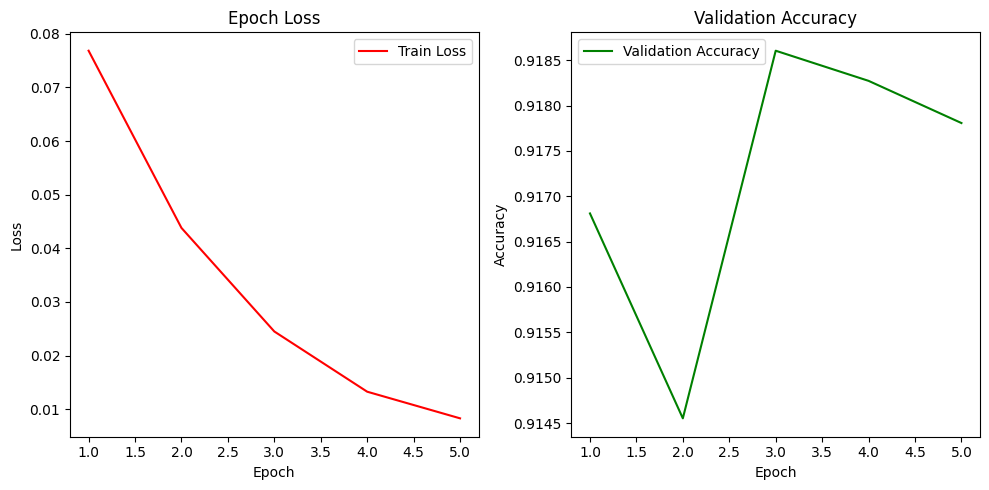

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/DB1-1_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/DB1-1.pt"
student_model.load_state_dict(torch.load(BERT_Tuned_file))

In [ ]:
student_model.to(device)
student_model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            student_outputs = student_model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(student_outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 91.78%
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.91      0.92     10012
    positive       0.91      0.92      0.92      9938

    accuracy                           0.92     19950
   macro avg       0.92      0.92      0.92     19950
weighted avg       0.92      0.92      0.92     19950

Confusion Matrix:
 [[9132  880]
 [ 759 9179]]


# 3.1 Trying Distil BERT with Kullback-Leibler Loss function

In [ ]:
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
temperature = 5.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()
loss_fn = nn.CrossEntropyLoss()

# Initializing the BERT teacher model
teacher_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2).to(device)
teacher_model.eval()  # Setting to evaluation mode

# Initializing the DistilBERT student model and tokenizer
student_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 2).to(device)

optimizer = optim.Adam(student_model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0
    student_model.train()  # Setting to training mode

    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            teacher_outputs = teacher_model(inputs, attention_mask=attention_masks)
            teacher_logits =  teacher_outputs.logits

        student_outputs = student_model(inputs, attention_mask=attention_masks)
        student_logits = student_outputs.logits

        soft_loss = F.kl_div(F.log_softmax(student_logits / temperature, dim=1), F.softmax(teacher_logits / temperature, dim=1), reduction='batchmean')

        hard_loss = loss_fn(student_logits, labels)
        loss = 0.75 * soft_loss + 0.25 * hard_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()

# Validation
    student_model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            student_outputs = student_model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(student_outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = student_model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/DB2.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.09336680314938227, Validation Accuracy: 0.913953488372093
Epoch 2/5, Loss: 0.06812902481953304, Validation Accuracy: 0.9133554817275747
Epoch 3/5, Loss: 0.05699150208234787, Validation Accuracy: 0.9172093023255814
Epoch 4/5, Loss: 0.05091104418039322, Validation Accuracy: 0.9182724252491694
Epoch 5/5, Loss: 0.04849560304482778, Validation Accuracy: 0.9195348837209303


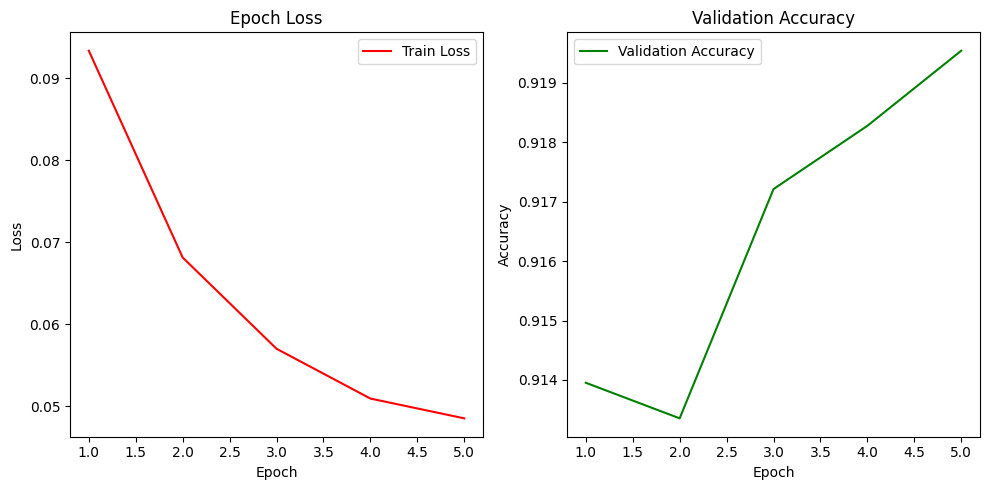

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/DB2_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/DB2.pt"
student_model.load_state_dict(torch.load(BERT_Tuned_file))

In [ ]:
student_model.to(device)
student_model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            student_outputs = student_model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(student_outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 91.89%
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.91      0.92     10012
    positive       0.91      0.93      0.92      9938

    accuracy                           0.92     19950
   macro avg       0.92      0.92      0.92     19950
weighted avg       0.92      0.92      0.92     19950

Confusion Matrix:
 [[9140  872]
 [ 745 9193]]


# 3.1.1 Trying Distil BERT with Kullback-Leibler Loss function adjusting the weights

In [ ]:
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
temperature = 5.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()
loss_fn = nn.CrossEntropyLoss()

# Initializing the BERT teacher model
teacher_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2).to(device)
teacher_model.eval()  # Setting to evaluation mode

# Initializing the DistilBERT student model and tokenizer
student_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 2).to(device)

optimizer = optim.Adam(student_model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0
    student_model.train()  # Setting to training mode

    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            teacher_outputs = teacher_model(inputs, attention_mask=attention_masks)
            teacher_logits =  teacher_outputs.logits

        student_outputs = student_model(inputs, attention_mask=attention_masks)
        student_logits = student_outputs.logits

        soft_loss = F.kl_div(F.log_softmax(student_logits / temperature, dim=1), F.softmax(teacher_logits / temperature, dim=1), reduction='batchmean')

        hard_loss = loss_fn(student_logits, labels)
        loss = 0.95 * soft_loss + 0.05 * hard_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()

# Validation
    student_model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            student_outputs = student_model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(student_outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = student_model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/DB2-1.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.025729692857464154, Validation Accuracy: 0.8864451827242525
Epoch 2/5, Loss: 0.023247328745325407, Validation Accuracy: 0.9151495016611295
Epoch 3/5, Loss: 0.021918411765495936, Validation Accuracy: 0.9104983388704319
Epoch 4/5, Loss: 0.02127955854535103, Validation Accuracy: 0.919468438538206
Epoch 5/5, Loss: 0.02102666530609131, Validation Accuracy: 0.9190697674418604


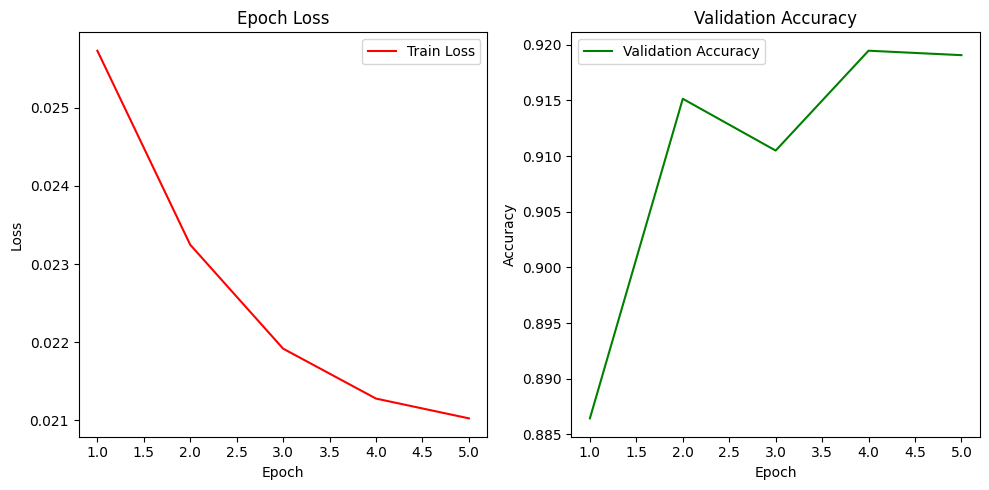

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/DB2-1_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/DB2-1.pt"
student_model.load_state_dict(torch.load(BERT_Tuned_file))

In [ ]:
student_model.to(device)
student_model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            student_outputs = student_model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(student_outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 91.83%
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.91      0.92     10012
    positive       0.91      0.92      0.92      9938

    accuracy                           0.92     19950
   macro avg       0.92      0.92      0.92     19950
weighted avg       0.92      0.92      0.92     19950

Confusion Matrix:
 [[9155  857]
 [ 773 9165]]


# 4. Gradient Clipping Technique

In [ ]:
from torch.optim.lr_scheduler import LambdaLR

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
lambda_lr = lambda epoch: 0.90 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda_lr)


# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks,labels =labels)

        loss = outputs.loss

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBGC.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.2726807434161504, Validation Accuracy: 0.9217940199335548
Epoch 2/5, Loss: 0.14087557433048883, Validation Accuracy: 0.9289700996677741
Epoch 3/5, Loss: 0.08128276056051255, Validation Accuracy: 0.9296345514950166
Epoch 4/5, Loss: 0.04775056019922098, Validation Accuracy: 0.9300996677740864
Epoch 5/5, Loss: 0.02886162898267309, Validation Accuracy: 0.9178737541528239


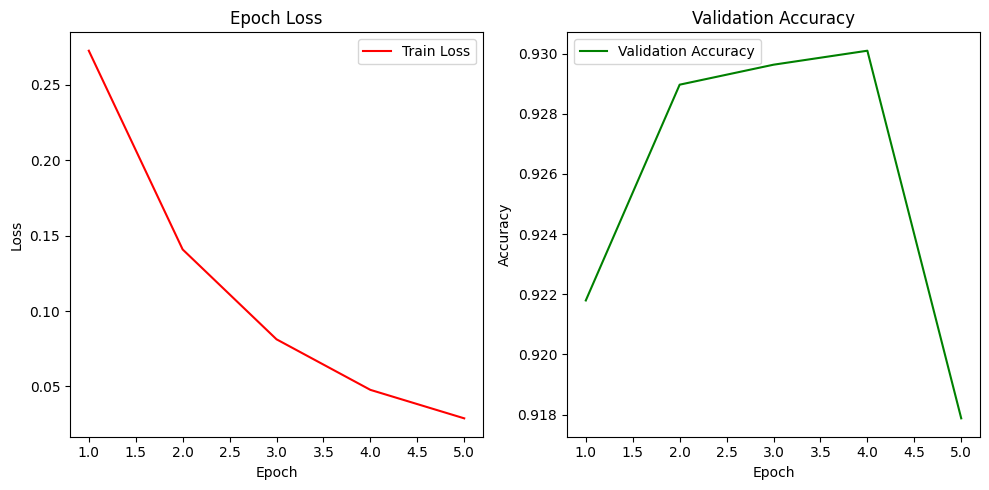

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBGC_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBGC.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))

In [ ]:
model.to(device)
model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 91.81%
Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.96      0.92     10012
    positive       0.96      0.87      0.91      9938

    accuracy                           0.92     19950
   macro avg       0.92      0.92      0.92     19950
weighted avg       0.92      0.92      0.92     19950

Confusion Matrix:
 [[9632  380]
 [1253 8685]]


# 4.1 Reducing Gradient Clipping

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
lambda_lr = lambda epoch: 0.90 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda_lr)


# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBGC1.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.2828793835322062, Validation Accuracy: 0.92
Epoch 2/5, Loss: 0.14921502476533255, Validation Accuracy: 0.9217275747508306
Epoch 3/5, Loss: 0.08871156468143065, Validation Accuracy: 0.9267109634551495
Epoch 4/5, Loss: 0.05736571402847767, Validation Accuracy: 0.9246511627906977
Epoch 5/5, Loss: 0.035739976880823573, Validation Accuracy: 0.9285714285714286


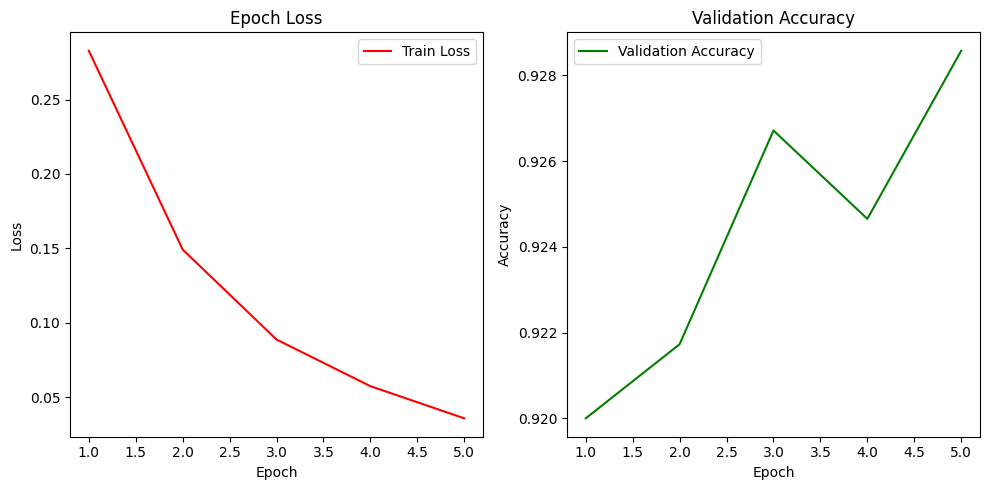

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBGC1_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBGC1.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))

In [ ]:
model.to(device)
model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 92.63%
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.91      0.93     10012
    positive       0.92      0.94      0.93      9938

    accuracy                           0.93     19950
   macro avg       0.93      0.93      0.93     19950
weighted avg       0.93      0.93      0.93     19950

Confusion Matrix:
 [[9154  858]
 [ 613 9325]]


# 4.2 Further Reducing Gradient Clipping

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 32
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
lambda_lr = lambda epoch: 0.90 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda_lr)


# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.55)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBGC2.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.27350833708047867, Validation Accuracy: 0.8968106312292359
Epoch 2/5, Loss: 0.14032256883382796, Validation Accuracy: 0.9267109634551495
Epoch 3/5, Loss: 0.0830341739843289, Validation Accuracy: 0.9190033222591362
Epoch 4/5, Loss: 0.049553095600008965, Validation Accuracy: 0.9273089700996677
Epoch 5/5, Loss: 0.03168813774436712, Validation Accuracy: 0.9306312292358804


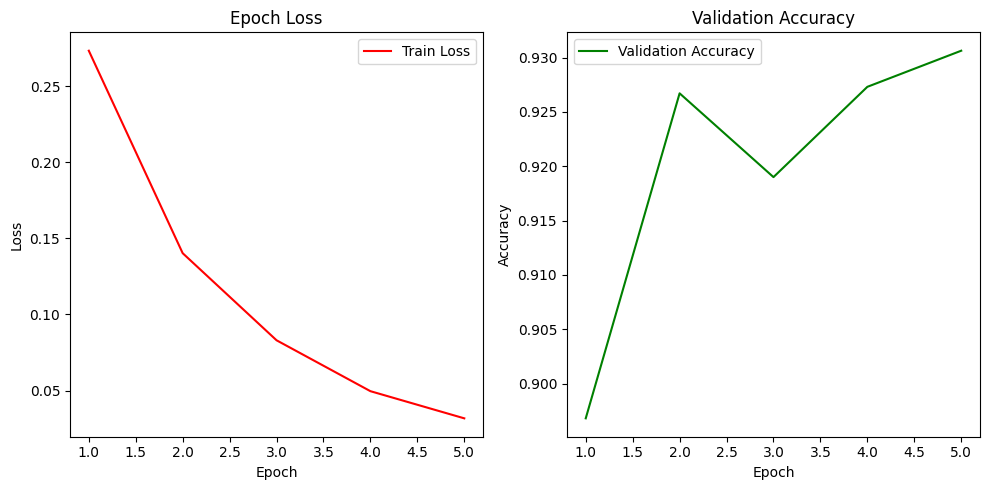

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBGC2_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBGC2.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))

In [ ]:
model.to(device)
model.eval()

# Creating dataloaders for test
batch_size = 32
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 92.72%
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.93      0.93     10012
    positive       0.93      0.93      0.93      9938

    accuracy                           0.93     19950
   macro avg       0.93      0.93      0.93     19950
weighted avg       0.93      0.93      0.93     19950

Confusion Matrix:
 [[9289  723]
 [ 729 9209]]


In [ ]:
user_input = input("Enter a sentence: ")
preprocessed_input = preprocess_text(user_input)
encoded_input= tokenizer.batch_encode_plus(
    [preprocessed_input],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
input_ids = encoded_input['input_ids'].to(device)
attention_masks_test = encoded_input['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks_test)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

class_names = ["negative", "positive"]
predicted_sentiment = class_names[predicted_label]
print("Predicted sentiment:", predicted_sentiment)

Enter a sentence: really linked to it
Predicted sentiment: positive
